In [1]:
import wrangle as wrg
import scipy.stats as stats
import pandas as pd
import os
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

import env

In [2]:
sql_query = "select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips from properties_2017 where propertylandusetypeid = 261"
directory = os.getcwd()
url_for_query = wrg.get_db_url("zillow")
filename = "zillow_2017.csv"

In [7]:
zillow_2017 = wrg.get_sql_data(sql_query, url_for_query, filename)

csv found and loaded


In [4]:
zillow_2017.head()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [6]:
zillow_2017.describe

<bound method NDFrame.describe of          Unnamed: 0  bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
0                 0         0.0          0.0                           NaN   
1                 1         0.0          0.0                           NaN   
2                 2         0.0          0.0                           NaN   
3                 3         0.0          0.0                           NaN   
4                 4         4.0          2.0                        3633.0   
...             ...         ...          ...                           ...   
2152858     2152858         4.0          3.0                        2262.0   
2152859     2152859         4.0          4.5                        3127.0   
2152860     2152860         0.0          0.0                           NaN   
2152861     2152861         3.0          2.5                        1974.0   
2152862     2152862         4.0          4.0                        2110.0   

         taxvaluedollarcnt  y

In [7]:
zillow_2017.dtypes

Unnamed: 0                        int64
bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
dtype: object

In [8]:
zillow_2017.shape

(2152863, 8)

In [4]:
wrg.is_it_null(zillow_2017)

False    2152863
Name: Unnamed: 0, dtype: int64
False    2152852
True          11
Name: bedroomcnt, dtype: int64
False    2152852
True          11
Name: bathroomcnt, dtype: int64
False    2144379
True        8484
Name: calculatedfinishedsquarefeet, dtype: int64
False    2152370
True         493
Name: taxvaluedollarcnt, dtype: int64
False    2143526
True        9337
Name: yearbuilt, dtype: int64
False    2148421
True        4442
Name: taxamount, dtype: int64
False    2152863
Name: fips, dtype: int64


In [5]:
zillow_2017 = zillow_2017.dropna()

In [6]:
wrg.is_it_null(zillow_2017)

False    2140235
Name: Unnamed: 0, dtype: int64
False    2140235
Name: bedroomcnt, dtype: int64
False    2140235
Name: bathroomcnt, dtype: int64
False    2140235
Name: calculatedfinishedsquarefeet, dtype: int64
False    2140235
Name: taxvaluedollarcnt, dtype: int64
False    2140235
Name: yearbuilt, dtype: int64
False    2140235
Name: taxamount, dtype: int64
False    2140235
Name: fips, dtype: int64


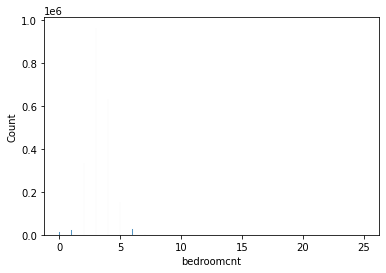

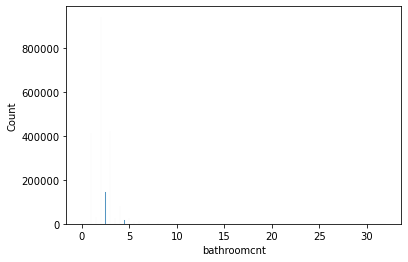

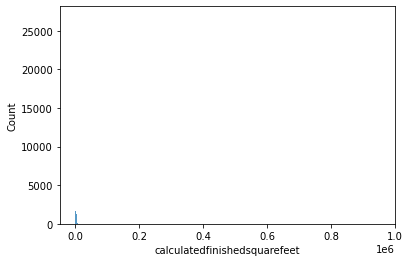

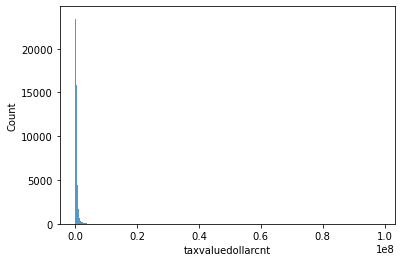

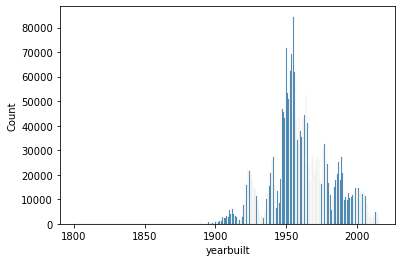

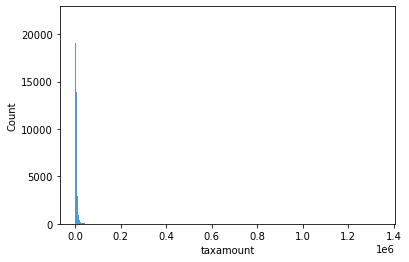

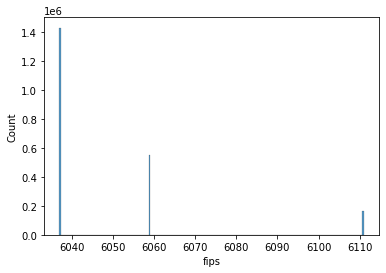

In [4]:
wrg.plot_uni_var(zillow_2017)

In [ ]:
#Quick look indecates fips, yearbuilt, calculatedfinishedsquarefeet best corolates with taxvaluedollarcnt and taxamount
#taxvaluedollercnt is the target var

In [5]:
zillow_2017.nunique()

Unnamed: 0                      2152863
bedroomcnt                           19
bathroomcnt                          38
calculatedfinishedsquarefeet      10580
taxvaluedollarcnt                592269
yearbuilt                           153
taxamount                        918838
fips                                  3
dtype: int64

In [22]:

zillow_2017.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips


In [23]:
zillow_2017[zillow_2017.duplicated()]


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips


In [ ]:
#the cleaned up good way

In [3]:
zillow_2017 = wrg.get_sql_data(sql_query, url_for_query, filename)

csv found and loaded


In [4]:
wrg.wrangle_zillow(zillow_2017)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA
...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,LA
2152858,4,3.0,2262,960756,2015,13494.52,Orange
2152859,4,4.5,3127,536061,2014,6244.16,Orange
2152861,3,2.5,1974,424353,2015,5302.70,Orange
